In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import PCA

import sys
sys.path.insert(0, "C:/workspace/data-science//libs")
from simulation_core import Simulation

86400 24 3600


# Principle of work

Principle of analysis is similar to the case of classic pools, check there for more info

### Setting simulation instances that contain all required info

In [2]:
# Meme token pools
doge_weth_sim = Simulation(experiment_id = 21, x_name = 'DOGE', y_name = 'WETH', 
                           window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
elon_weth_sim = Simulation(experiment_id = 22, x_name = 'ELON', y_name = 'WETH', 
                           window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
shib_weth_sim = Simulation(experiment_id = 23, x_name = 'SHIB', y_name = 'WETH', 
                           window_size = 24, 
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
squid_weth_sim = Simulation(experiment_id = 24, x_name = 'SQUID', y_name = 'WETH', 
                            window_size = 24, 
                            base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

### Getting original swaps dataframes

In [3]:
doge_weth_swaps_df = doge_weth_sim.get_original_swaps_df()
elon_weth_swaps_df = elon_weth_sim.get_original_swaps_df()
shib_weth_swaps_df = shib_weth_sim.get_original_swaps_df()
squid_weth_swaps_df = squid_weth_sim.get_original_swaps_df()

### Setting concatenation between original swaps dataframe and gas-related info

In [4]:
meme_pools_list = [doge_weth_swaps_df, elon_weth_swaps_df, shib_weth_swaps_df, 
                   squid_weth_swaps_df]

meme_pools_swaps_df = pd.concat(meme_pools_list)
with open('meme_pools_mevs', 'rb') as f: mevs_transactions_list = pickle.load(f)

mevs_df = pd.read_pickle('meme_pools_mevs_with_gas_df.pkl')
mevs_df['txd'] = mevs_transactions_list
mevs_df

txd     block  \
0      0x29f1198e83ea9535c39e3eb154e935842383d354ccf2...  11682958   
1      0xebf2cf1a00e3cce72bd4240382d5630e5fac0e208ec5...  11682958   
2      0xcd908a6c965d2dcfc4290dfb86dd66a287014c7f8dd2...  11742210   
3      0xe7d1c72395a7eca4f8d56ce1870599e427fd3dd98571...  11742210   
4      0xf44a8cf053b93c2b65e49544a603be700a4e34cf6e50...  11742210   
...                                                  ...       ...   
24478  0x2e7f0c4b904b1920a4f780596cd7c3f3051c53cd406d...  13677746   
24479  0xb1025f1069c6af5a3618f762306980e56bd022d26aa7...  13678409   
24480  0xcbbee073ba8ed5ef6ca640bceaf32558f95e5a6d7a44...  13678409   
24481  0x3e58b06968559ee1f557f38a555d9b34d8d30dbbbe0c...  13681210   
24482  0xf3f901305334c9b8fdeb33c1a1a75a5ac7aea4cd9810...  13681210   

      block_position gas_usage_by_tx ether_price                tx_fee  
0                187          65,948    1,367.65  0.000000098999999999  
1                153          86,483    1,367.65  0.000000099000001072  
2                199          89,668    1,330.78           0.000000062  
3                197          73,420    1,330.78           0.000000062  
4                189         100,331    1,330.78  0.000000062023008256  
...              ...             ...         ...                   ...  
24478              1         131,261    4,271.96  0.000000117274970976  
24479              2         112,677    4,271.96  0.000002730906015544  
24480              0         131,297    4,271.96   0.00000017136292588  
24481              0          87,588    4,523.80   0.00000010926083694  
24482              2          77,577    4,523.80  0.000000745364537505  

[24483 rows x 6 columns]

In [5]:
mevs_df = pd.merge(mevs_df, meme_pools_swaps_df, on='txd', how='left')

There is a bug present due to the etherscan data extraction and it is required to remove additional symbols

In [6]:
mevs_df['block'] = pd.to_numeric(mevs_df['block'])
mevs_df['block_position'] = pd.to_numeric(mevs_df['block_position'])
mevs_df['gas_usage_by_tx'] = pd.to_numeric(mevs_df['gas_usage_by_tx'].str.replace(',', ''))
mevs_df['ether_price'] = mevs_df['ether_price'].str.replace('$', '')
mevs_df['ether_price'] = pd.to_numeric(mevs_df['ether_price'].str.replace(',', ''))
mevs_df['tx_fee'] = pd.to_numeric(mevs_df['tx_fee'].str.replace('wei', ''))
mevs_df['gas_price'] = pd.to_numeric(mevs_df['gas_price']) / 1000000000000000000
mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24483 entries, 0 to 24482
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              24483 non-null  object        
 1   block            24483 non-null  int64         
 2   block_position   24483 non-null  int64         
 3   gas_usage_by_tx  24483 non-null  int64         
 4   ether_price      24483 non-null  float64       
 5   tx_fee           24483 non-null  float64       
 6   token_in         24483 non-null  object        
 7   token_out        24483 non-null  object        
 8   amount_in        24483 non-null  float64       
 9   amount_out       24483 non-null  float64       
 10  amount_usd       24483 non-null  float64       
 11  timestamp        24483 non-null  datetime64[ns]
 12  sender           24483 non-null  object        
 13  to               24483 non-null  object        
 14  gas_price        24483 non-null  float

<ipython-input-6-93765c841fd8>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  mevs_df['ether_price'] = mevs_df['ether_price'].str.replace('$', '')


In [7]:
pca = PCA(n_components=1)
mevs_df['pca_tx_values'] = pca.fit_transform(mevs_df[['amount_in', 'amount_out']])

pca = PCA(n_components=3)
mevs_df[['pca_1', 'pca_2', 'pca_3']] = pca.fit_transform(
    mevs_df[['block', 'block_position', 'gas_usage_by_tx', 'ether_price',
            'tx_fee', 'amount_in', 'amount_out', 'amount_usd', 'gas_price']]
)

### Correlation between features

Correlation between block number and Ether price is extremely high. There is a medium level correlation between gas price and ```amount_in``` value of transaction. ```tx_fee``` has a medium level correlation with ```amount_in``` and ```ether_price```. Those correlation are stronger compared to the case of classic tokens.

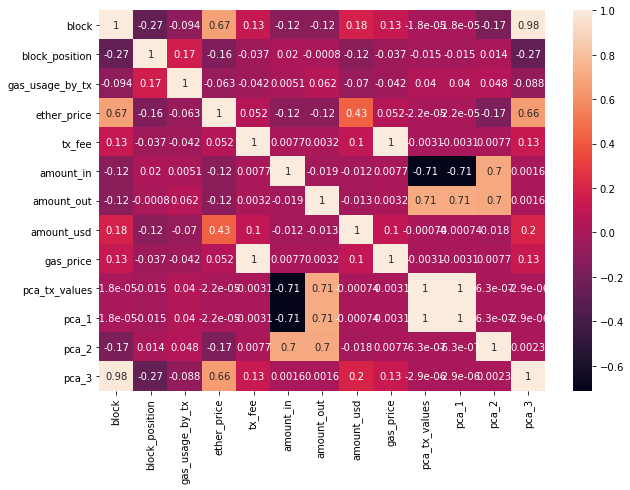

In [8]:
plt.figure(figsize=(10, 7))
sns.heatmap(mevs_df[mevs_df['tx_fee'] < 0.5].corr(), annot=True)
plt.show()

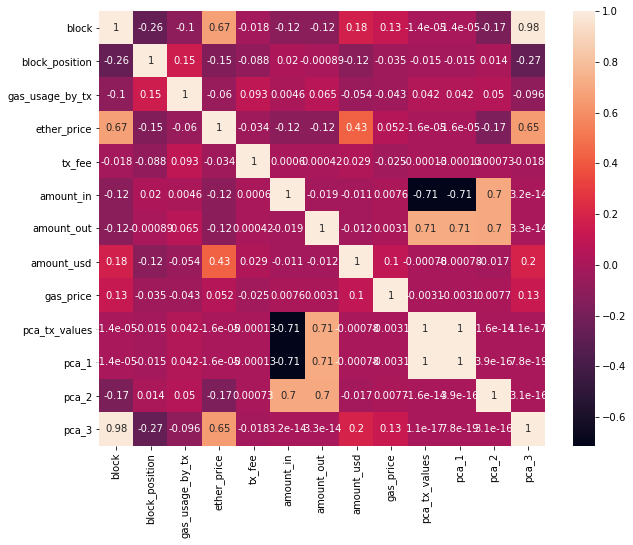

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(mevs_df.corr(), annot=True)
plt.show()

### Setting scatters of features

There is a problem with dataset of ```tx_fee``` values equal to 1 (possible source error) and therefore records with value around 1 were ignored.

There is almost no connection present between tx fee and gas usage. Can be seen that most of the records are concentrated around small values with some extreme outliers. Therefore it was decided to check connection with ether price (even considering that correlation presented in the heatmap is small).

Connection is weak and there is no observable pattern between Ether price and value with fee of the transaction.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


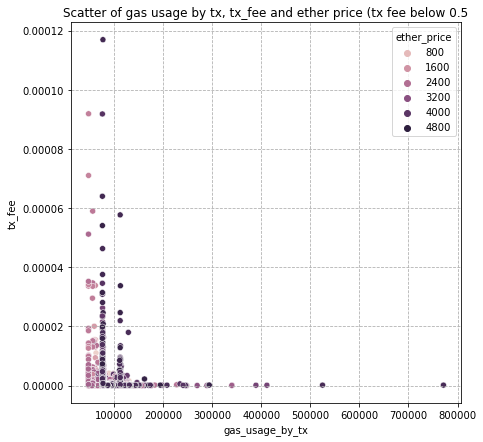

In [10]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['gas_usage_by_tx'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['ether_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee below 0.5')
plt.show()

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


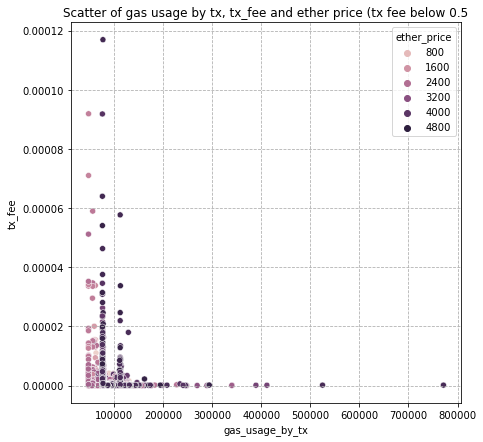

In [11]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['gas_usage_by_tx'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['ether_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee below 0.5)')
plt.show()

In [12]:
mevs_df

txd     block  \
0      0x29f1198e83ea9535c39e3eb154e935842383d354ccf2...  11682958   
1      0xebf2cf1a00e3cce72bd4240382d5630e5fac0e208ec5...  11682958   
2      0xcd908a6c965d2dcfc4290dfb86dd66a287014c7f8dd2...  11742210   
3      0xe7d1c72395a7eca4f8d56ce1870599e427fd3dd98571...  11742210   
4      0xf44a8cf053b93c2b65e49544a603be700a4e34cf6e50...  11742210   
...                                                  ...       ...   
24478  0x2e7f0c4b904b1920a4f780596cd7c3f3051c53cd406d...  13677746   
24479  0xb1025f1069c6af5a3618f762306980e56bd022d26aa7...  13678409   
24480  0xcbbee073ba8ed5ef6ca640bceaf32558f95e5a6d7a44...  13678409   
24481  0x3e58b06968559ee1f557f38a555d9b34d8d30dbbbe0c...  13681210   
24482  0xf3f901305334c9b8fdeb33c1a1a75a5ac7aea4cd9810...  13681210   

       block_position  gas_usage_by_tx  ether_price        tx_fee token_in  \
0                 187            65948      1367.65  9.900000e-08     DOGE   
1                 153            86483      1367.65  9.900000e-08     WETH   
2                 199            89668      1330.78  6.200000e-08     DOGE   
3                 197            73420      1330.78  6.200000e-08     DOGE   
4                 189           100331      1330.78  6.202301e-08     WETH   
...               ...              ...          ...           ...      ...   
24478               1           131261      4271.96  1.172750e-07     ELON   
24479               2           112677      4271.96  2.730906e-06     WETH   
24480               0           131297      4271.96  1.713629e-07     ELON   
24481               0            87588      4523.80  1.092608e-07     WETH   
24482               2            77577      4523.80  7.453645e-07     ELON   

      token_out     amount_in    amount_out     amount_usd  \
0          WETH  1.560818e+05  1.087636e+00    1438.742079   
1          DOGE  1.058772e+00  1.560818e+05    1400.560434   
2          WETH  1.662418e+04  1.143991e-01     146.473384   
3          WETH  1.662694e+03  1.150318e-02      14.728355   
4          DOGE  1.000000e-02  1.662694e+03      12.803721   
...         ...           ...           ...            ...   
24478      WETH  3.429123e+10  1.082789e+01   45456.293591   
24479      ELON  2.997978e+01  9.581523e+10  126756.634235   
24480      WETH  9.416487e+10  2.997978e+01  126756.634235   
24481      ELON  6.781140e+01  2.035519e+11  292516.018530   
24482      WETH  2.035519e+11  6.788484e+01  292832.801292   

                timestamp                                      sender  \
0     2021-01-19 02:15:14  0x72aa814b8125f94c0341812994e8574f6c395660   
1     2021-01-19 02:15:14  0x72aa814b8125f94c0341812994e8574f6c395660   
2     2021-01-28 04:35:38  0xda6b746b76fdc8424764d6981e9ef5c3b13a56af   
3     2021-01-28 04:35:38  0x6f21854a903f396efdd36c2d145af973e2efe004   
4     2021-01-28 04:35:38  0x6f21854a903f396efdd36c2d145af973e2efe004   
...                   ...                                         ...   
24478 2021-11-24 14:34:31  0x000000000035b5e5ad9019092c665357240f594e   
24479 2021-11-24 17:08:03  0x000000000035b5e5ad9019092c665357240f594e   
24480 2021-11-24 17:08:03  0x000000000035b5e5ad9019092c665357240f594e   
24481 2021-11-25 03:43:03  0x00000000726422a6fecb4759b44d47e48cf746aa   
24482 2021-11-25 03:43:03  0x00000000726422a6fecb4759b44d47e48cf746aa   

                                               to     gas_price gas_used  \
0      0x72aa814b8125f94c0341812994e8574f6c395660  9.900000e-08   250000   
1      0x72aa814b8125f94c0341812994e8574f6c395660  9.900000e-08   350000   
2      0xda6b746b76fdc8424764d6981e9ef5c3b13a56af  6.200000e-08   238550   
3      0x6f21854a903f396efdd36c2d145af973e2efe004  6.200000e-08   350000   
4      0x6f21854a903f396efdd36c2d145af973e2efe004  6.202301e-08   450000   
...                                           ...           ...      ...   
24478  0x000000000035b5e5ad9019092c665357240f594e  1.172750e-07   231261   
24479  0x540c57a187e8405df4522b3786b774cecbf2

Most of the records are placed in the lowest left section, meaning that most of transactions are keeping a small level of gas consumption, but the most interesting moment is that all those low-value cases conform hue are having smallest ```gas_price``` values, meaning that most of the attacks are performed during low gas price. Therefore, low gas price will not cause higher transaction values (there is no strong correlation) but causes bigger MEV activity. This is similar to the case of reviewed classic tokens and reviewed NFT tokens.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


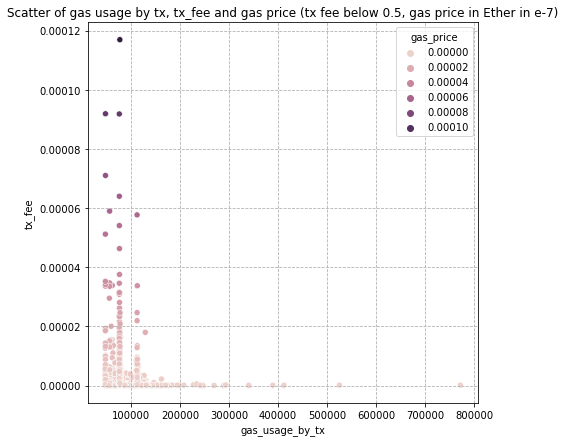

In [41]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[(mevs_df['tx_fee'] < 0.5)]['gas_usage_by_tx'], 
                mevs_df[(mevs_df['tx_fee'] < 0.5)]['tx_fee'], 
                hue=mevs_df[(mevs_df['tx_fee'] < 0.5)]['gas_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and gas price (tx fee below 0.5, gas price in Ether in e-7)')
plt.show()

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


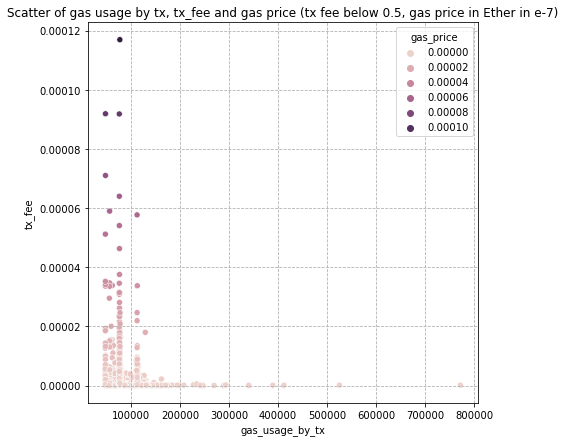

In [37]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['gas_usage_by_tx'], 
                mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['tx_fee'], 
                hue=mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['gas_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and gas price (tx fee below 0.5, gas price in Ether in e-7)')
plt.show()

Out of 24483 MEV transactions there are 687 transactions with incorrect ```tx_fee``` value. In case of plotting transaction with this outlier value can be seen that distribution is almost flatlined one.

Another interesting moment is that out of all transactions there are only 27 cases of MEV transactions capitalization below 300 USD and 654 MEV transactions with capitalization between 300 - 3000 USD.

In [15]:
print(len(mevs_df))

24483


In [16]:
print(len(mevs_df[mevs_df['tx_fee'] > 0.5]))

687


In [38]:
print(len(mevs_df[mevs_df['amount_usd'] < 3000]))

681


C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


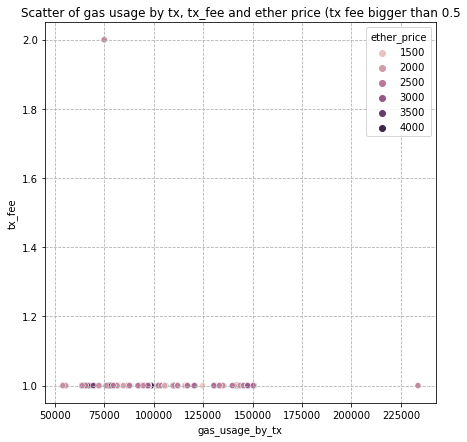

In [18]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] > 0.5]['gas_usage_by_tx'], 
                mevs_df[mevs_df['tx_fee'] > 0.5]['tx_fee'], 
                hue=mevs_df[mevs_df['tx_fee'] > 0.5]['ether_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee and ether price (tx fee bigger than 0.5)')
plt.show()

There is almost no observable connection between MEV transactions and Ether price change. This may be explained by the fact that meme tokens histories contain information about 2021 period, meaning that possible influence of the Ether price is smaller compared to previous cases, where is covered period of extreme Ether price rise.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


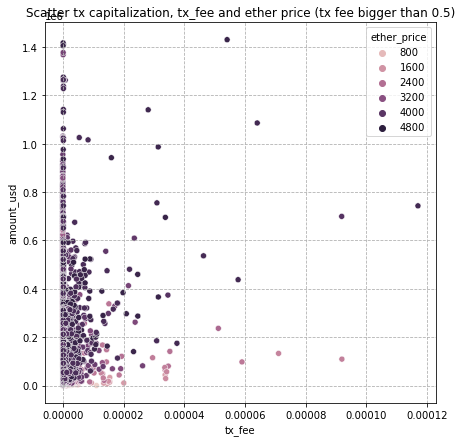

In [42]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['amount_usd'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['ether_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter tx capitalization, tx_fee and ether price (tx fee smaller than 0.5)')
plt.show()

Once more, all records are more concentrated on lower values of the gas price, meaning that lower gas price stimulates MEV attacks.

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


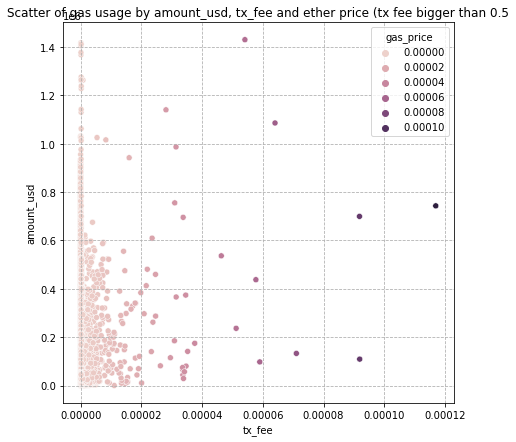

In [20]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['amount_usd'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['gas_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of tx capitalization, tx_fee and ether price (tx fee smaller than 0.5)')
plt.show()

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


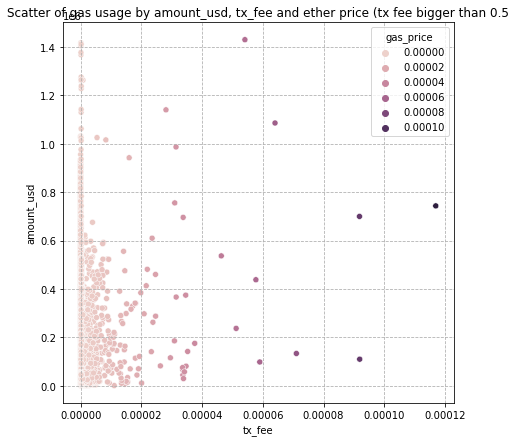

In [21]:
plt.figure(figsize=(7, 7))
sns.scatterplot(mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['tx_fee'], 
                mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['amount_usd'], 
                hue=mevs_df[(mevs_df['tx_fee'] < 0.5) & (mevs_df['amount_usd'] > 300)]['gas_price'])
plt.grid(True, linestyle='--')
plt.title('Scatter of tx capitalization, tx_fee and gas price (tx fee smaller than 0.5)')
plt.show()

There are only some unique attackers that are ready to pay higher transaction fees. Those unique cases are going out of the distribution for most of the records and can be seen that some addresses are representing a big number of records. It means that most of the records belong to several addresses. To ensure that, further countplot will be done

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


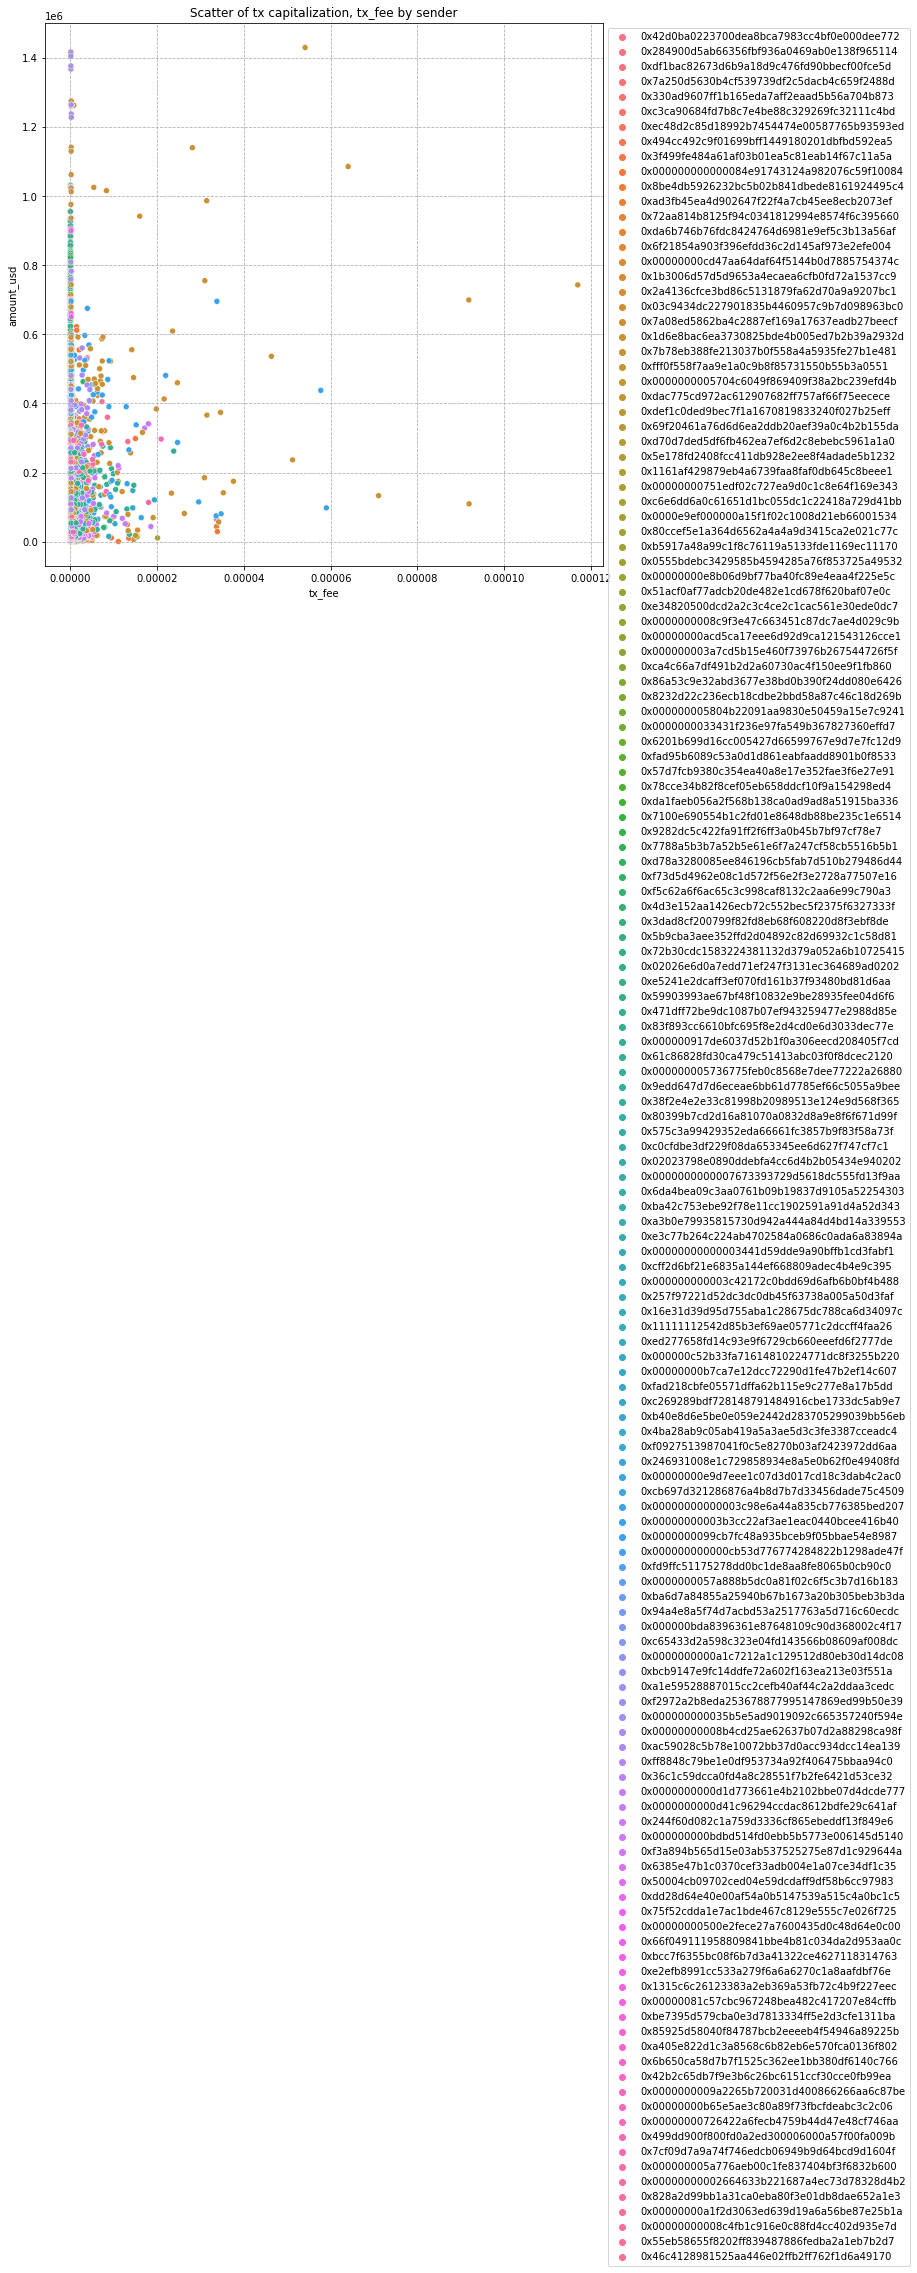

In [43]:
plt.figure(figsize=(10, 10))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['amount_usd'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['sender'])
plt.grid(True, linestyle='--')
plt.title('Scatter of tx capitalization, tx_fee by sender')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

Only in unique cases attackers are willing to perform transaction with high gas usage and high transaction fees, demonstrating desire for most of the attackers to minimize their losses

C:\Users\Zbook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


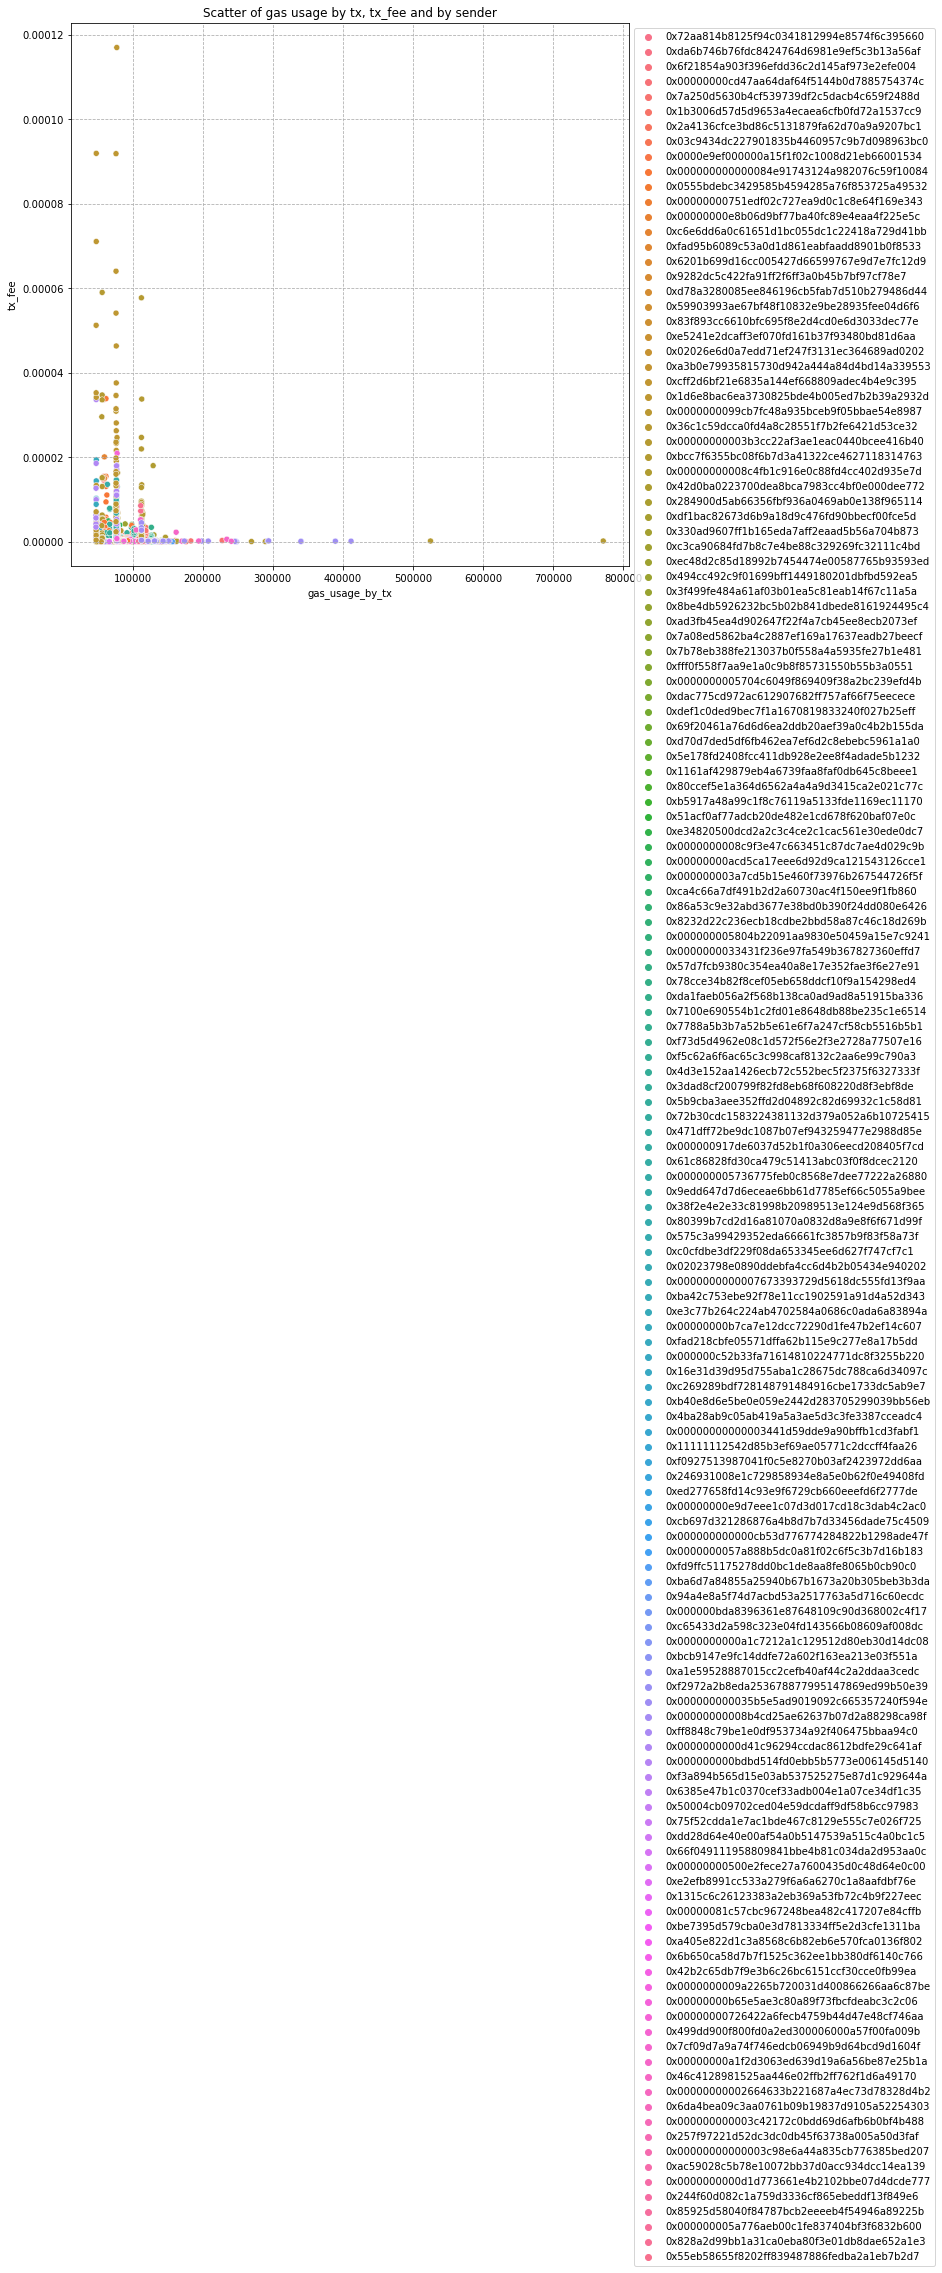

In [23]:
plt.figure(figsize=(10, 10))
sns.scatterplot(mevs_df[mevs_df['tx_fee'] < 0.5]['gas_usage_by_tx'], 
                mevs_df[mevs_df['tx_fee'] < 0.5]['tx_fee'], 
                hue=mevs_df[mevs_df['tx_fee'] < 0.5]['sender'])
plt.grid(True, linestyle='--')
plt.title('Scatter of gas usage by tx, tx_fee by sender')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()

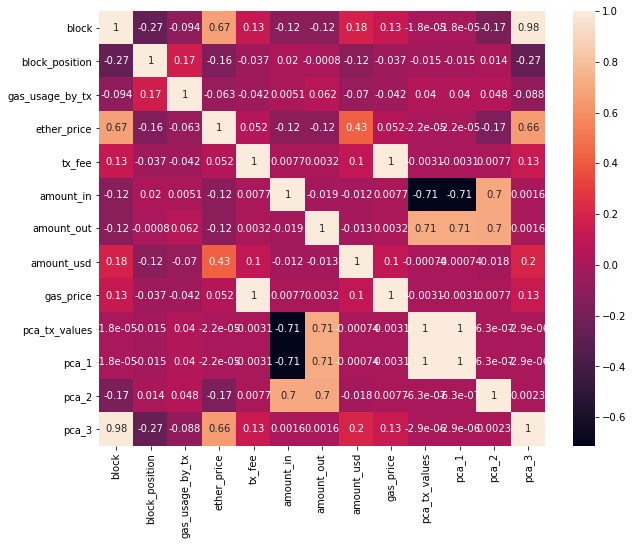

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(mevs_df[mevs_df['tx_fee'] < 1].corr(), annot=True)
plt.show()

In [25]:
mevs_df.sort_values(by=['block'], inplace=True)

In [26]:
mevs_df[mevs_df['tx_fee'] == 1]

txd     block  \
10     0xdb9b7e7a2d56b535e5fcca23d0efba370736e9e9bab0...  11742609   
11     0xe98b2f6ae4b9eae12152485512a1c133161390c7a22e...  11742609   
984    0xc58370c98382a14fa59f59ed1587d771ea752f25ff34...  11756243   
985    0xd9ede70cb9ff344bf29bcc2cea052c16395aaa35fc3a...  11756243   
1012   0x082cf4644596373da248b97a7ecd75afa0f312a204fc...  11757448   
...                                                  ...       ...   
14870  0x630f4b355238c77064be81774e1cb3dc9e7163147bd5...  12885848   
23324  0xd4b9f3ebd14b99e2bd1a553a1c0e13fd6a738b9a39ed...  12936284   
23323  0x90151820fc17d71e12b8d81c6f09f91d82db25f035c1...  12936284   
23367  0xa4f358d706c6355bb19849eed63cf6bec9dac01208e9...  12938343   
23368  0xc9d1df867e76e2e882b7bc51d88f592f2056f49732e4...  12938343   

       block_position  gas_usage_by_tx  ether_price  tx_fee token_in  \
10                  0           124552      1330.78     1.0     WETH   
11                  3            93519      1330.78     1.0     DOGE   
984                 6           124736      1379.35     1.0     WETH   
985                 9           100777      1379.35     1.0     SHIB   
1012                3           124736      1379.35     1.0     WETH   
...               ...              ...          ...     ...      ...   
14870               4            55411      2185.98     1.0     WETH   
23324               6            92039      2531.75     1.0     ELON   
23323               4            87685      2531.75     1.0     WETH   
23367               2            87673      2556.41     1.0     WETH   
23368               4            92027      2556.41     1.0     ELON   

      token_out     amount_in    amount_out    amount_usd           timestamp  \
10         DOGE  4.505573e+00  5.797645e+05   5893.532825 2021-01-28 06:05:37   
11         WETH  5.797645e+05  4.521464e+00   5914.319865 2021-01-28 06:05:37   
984        SHIB  2.331537e+00  1.552542e+12   3141.020503 2021-01-30 08:38:13   
985        WETH  1.552542e+12  2.362354e+00   3182.536924 2021-01-30 08:38:13   
1012       SHIB  1.038745e+00  6.943305e+11   1391.856824 2021-01-30 13:04:10   
...         ...           ...           ...           ...                 ...   
14870      SHIB  4.694768e+00  1.529505e+09   9965.404534 2021-07-24 00:46:27   
23324      WETH  5.095183e+11  2.136309e+01  54467.577336 2021-07-31 23:48:31   
23323      ELON  2.135238e+01  5.095183e+11  54440.272257 2021-07-31 23:48:31   
23367      ELON  3.626172e+00  9.051933e+10   9427.399737 2021-08-01 07:41:24   
23368      WETH  9.051933e+10  3.638936e+00   9460.585514 2021-08-01 07:41:24   

                                           sender  \
10     0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
11     0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
984    0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
985    0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
1012   0x7a250d5630b4cf539739df2c5dacb4c659f2488d   
...                                           ...   
14870  0x66f049111958809841bbe4b81c034da2d953aa0c   
23324  0x66f049111958809841bbe4b81c034da2d953aa0c   
23323  0x66f049111958809841bbe4b81c034da2d953aa0c   
23367  0x66f049111958809841bbe4b81c034da2d953aa0c   
23368  0x66f049111958809841bbe4b81c034da2d953aa0c   

                                               to     gas_price gas_used  \
10     0x7d92ad7e1b6ae22c6a43283af3856028cd3d856a  1.000000e-18   486400   
11     0x7a250d5630b4cf539739df2c5dacb4c659f2488d  1.000000e-18   486400   
984    0x7d92ad7e1b6ae22c6a43283af3856028cd3d856a  1.000000e-18   486400   
985    0x7a250d5630b4cf539739df2c5dacb4c659f2488d  1.000000e-18   486400   
1012   0x7d92ad7e1b6ae22c6a43283af3856028cd3d856a  1.000000e-18   486400   
...                                           ...           ...      ...   
14870  0x66f049111958809841bbe4b81c034da2d953aa0c  1.000000e-18   500000   
23324  0x66f049111958809841bbe4b81c034da2d953aa0c  1.000000e-18   500000   
23323  0x66f049111958809841bbe4b81c034da2d953aa0c  1.

Conform charts can be seen two interesting moments:

* Tx fee becomes higher with decrease of used gas. This is possible due to rise of gas price during decrease of gas usage (it correlates with gas price decrease).
* MEV transactions capitalization increases during decrease of the gas price, meaning that attackers try to perform attacks with higher capitalization in case of decrease in gas price

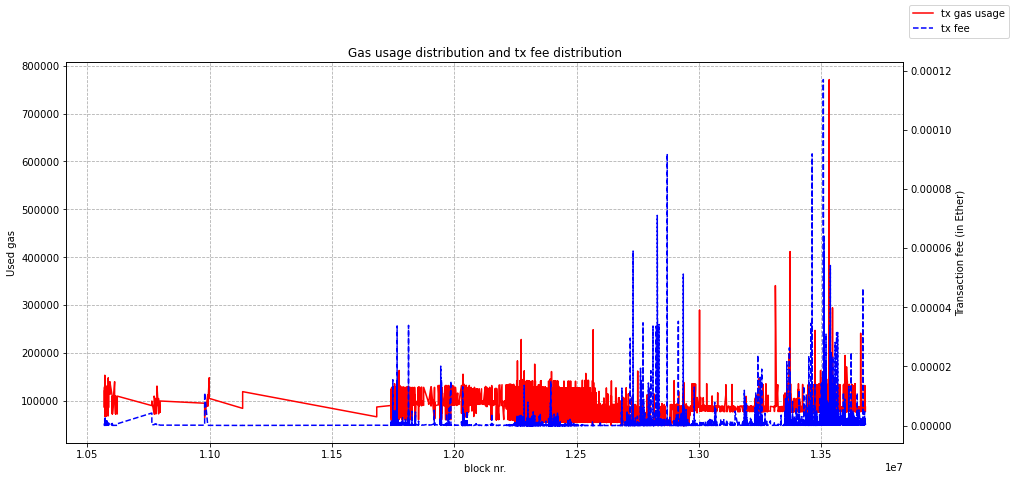

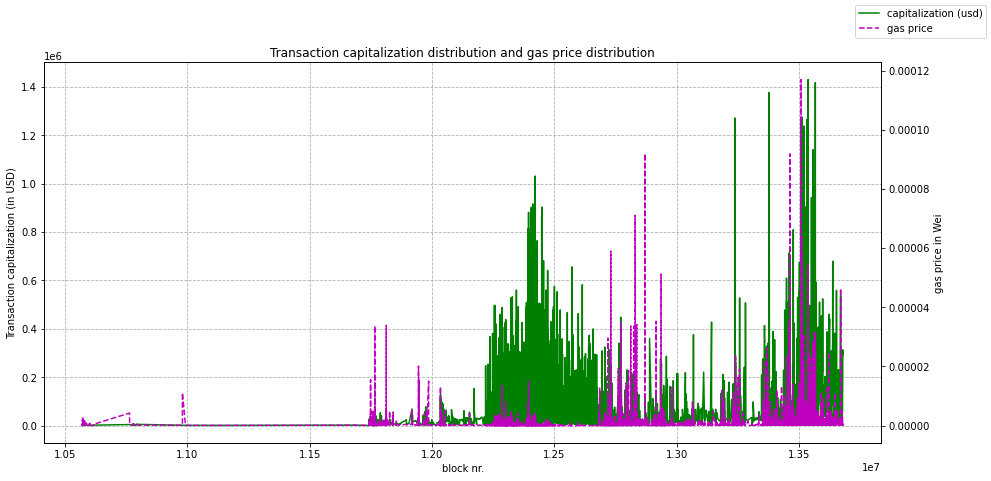

In [46]:
# gas usage and tx fee
fig, ax = plt.subplots(figsize=(15, 7))
ax2 = ax.twinx()
ax.plot(mevs_df[mevs_df['tx_fee'] < 1]['block'], 
        mevs_df[mevs_df['tx_fee'] < 1]['gas_usage_by_tx'], 
        color='r', label='tx gas usage')
ax2.plot(mevs_df[mevs_df['tx_fee'] < 1]['block'], 
         mevs_df[mevs_df['tx_fee'] < 1]['tx_fee'], 
         color='b', linestyle='--', label='tx fee')
ax.set_title('Gas usage distribution and tx fee distribution')
ax.set_xlabel('block nr.')
ax.set_ylabel('Used gas')
ax2.set_ylabel('Transaction fee (in Ether)')
ax.grid(True, linestyle='--')
fig.legend()
plt.show()


# capitalization and gas price
fig, ax = plt.subplots(figsize=(15, 7))
ax2 = ax.twinx()
ax.plot(mevs_df['block'], mevs_df['amount_usd'], color='g', label='capitalization (usd)')
ax2.plot(mevs_df['block'], mevs_df['gas_price'], color='m', linestyle='--', label='gas price')
ax.set_title('Transaction capitalization distribution and gas price distribution')
ax.set_xlabel('block nr.')
ax.set_ylabel('Transaction capitalization (in USD)')
ax2.set_ylabel('gas price in Wei')
ax.grid(True, linestyle='--')
fig.legend()
plt.show()

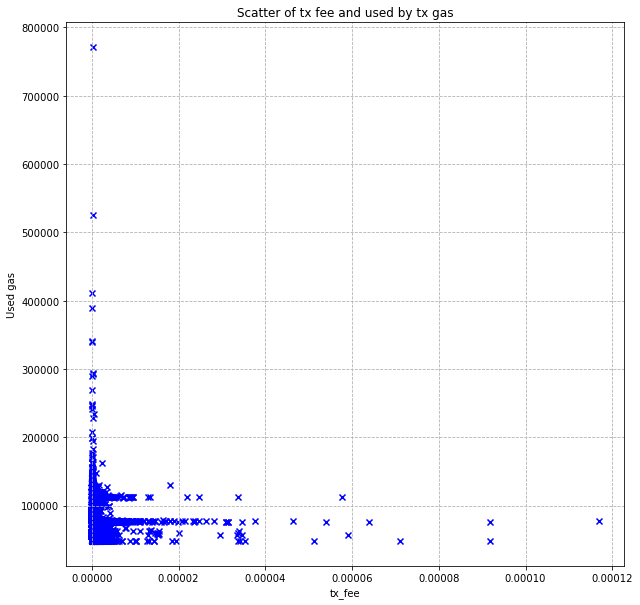

In [48]:
# gas usage plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(mevs_df[mevs_df['tx_fee'] < 1]['tx_fee'], 
           mevs_df[mevs_df['tx_fee'] < 1]['gas_usage_by_tx'], 
           marker='x', color='b')
ax.set_title('Scatter of tx fee and used by tx gas')
ax.set_xlabel('tx_fee')
ax.set_ylabel('Used gas')
ax.grid(True, linestyle='--')
plt.show()


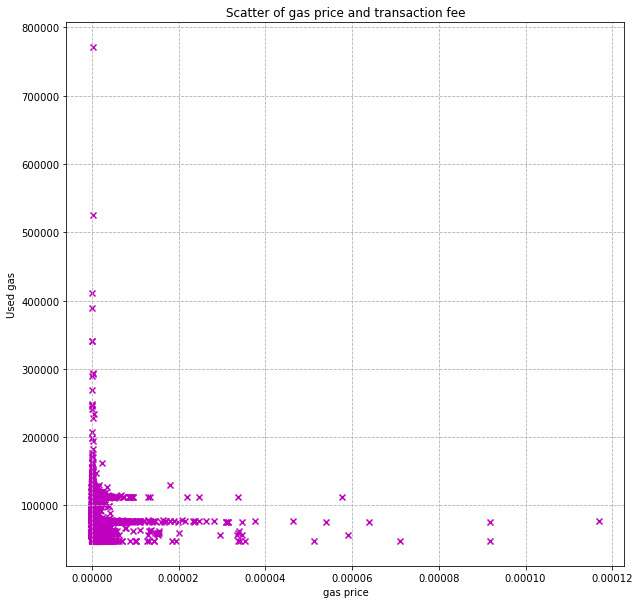

In [49]:
# gas usage plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(mevs_df[mevs_df['tx_fee'] < 1]['gas_price'], 
           mevs_df[mevs_df['tx_fee'] < 1]['gas_usage_by_tx'], 
           marker='x', color='m')
ax.set_title('Scatter of gas price and transaction fee')
ax.set_xlabel('gas price')
ax.set_ylabel('Used gas')
ax.grid(True, linestyle='--')
plt.show()


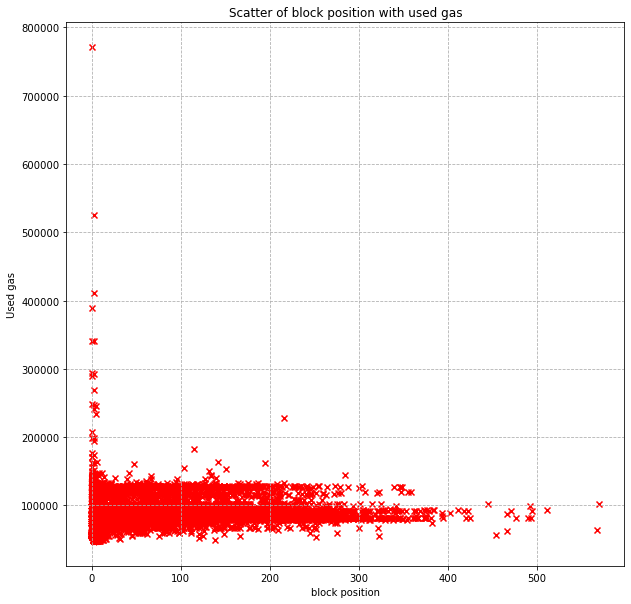

In [50]:
# gas usage plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(mevs_df[mevs_df['tx_fee'] < 1]['block_position'], 
           mevs_df[mevs_df['tx_fee'] < 1]['gas_usage_by_tx'], 
           marker='x', color='r')
ax.set_title('Scatter of block position with used gas')
ax.set_xlabel('block position')
ax.set_ylabel('Used gas')
ax.grid(True, linestyle='--')
plt.show()


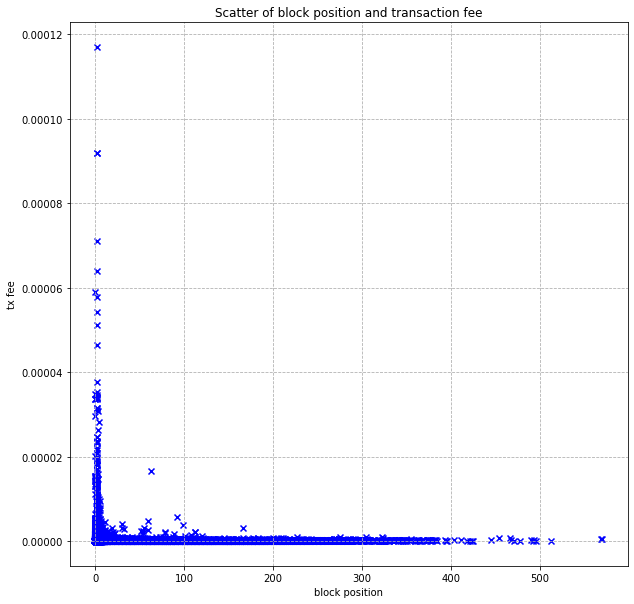

In [52]:
# gas usage plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(mevs_df[mevs_df['tx_fee'] < 1]['block_position'], 
           mevs_df[mevs_df['tx_fee'] < 1]['tx_fee'], 
           marker='x', color='b')
ax.set_title('Scatter of block position and transaction fee')
ax.set_xlabel('block position')
ax.set_ylabel('tx fee')
ax.grid(True, linestyle='--')
plt.show()


In most of the cases, MEV transactions are the first and the third ones (which corresponds to the basic attack pattern), but there are some specific cases of attacks happening little later (till position 9). All values above 10-th position are more likely to be outliers. Those assumptions are made based on the principle of MEV attack, which tries to perform transactions while being the first one in the block. 

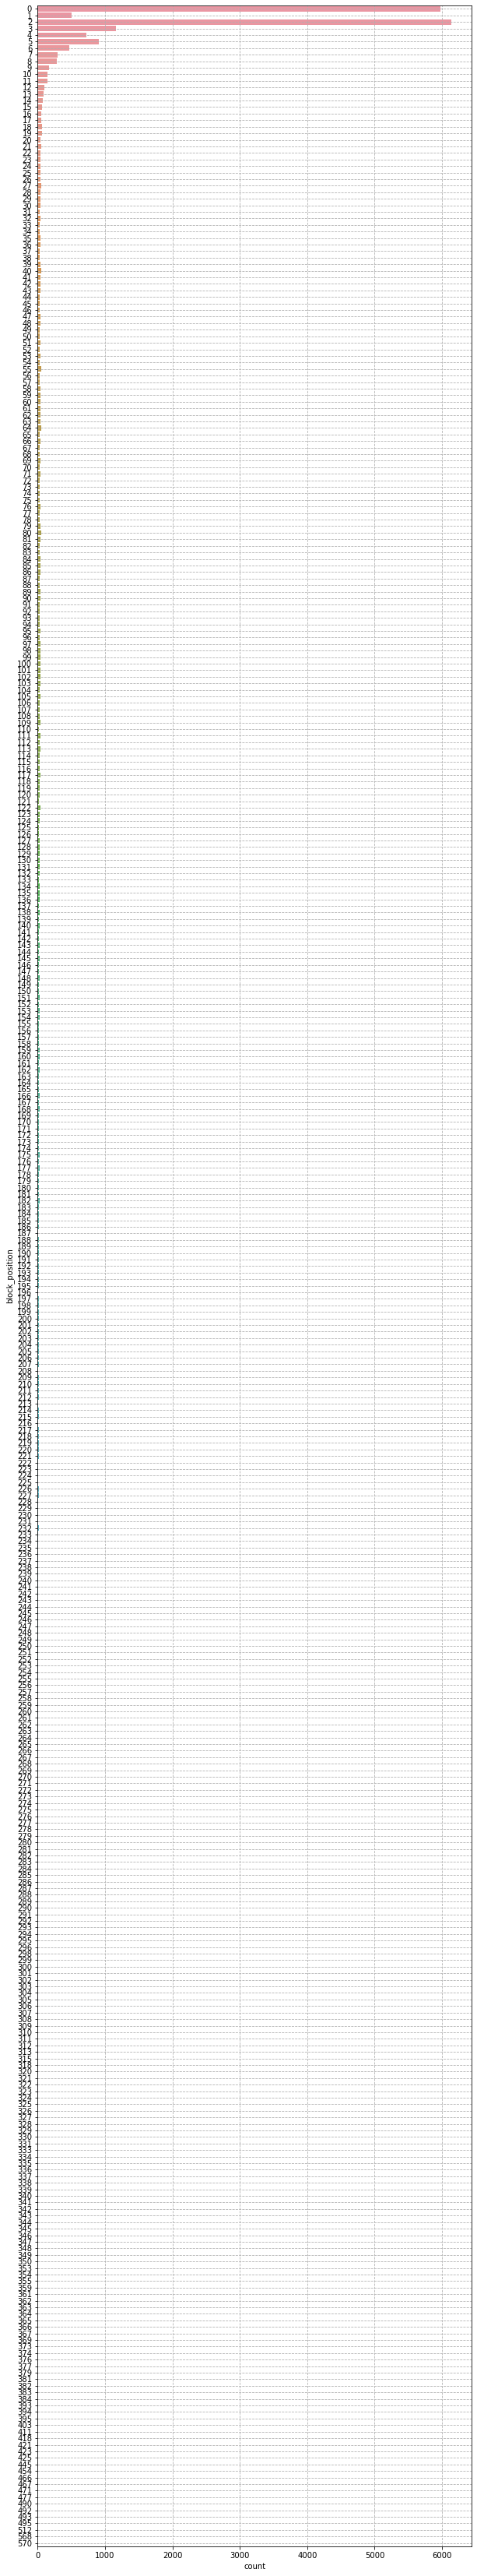

In [53]:
plt.figure(figsize=(10, 60))
sns.countplot(y='block_position', data=mevs_df)
plt.grid(True, linestyle='--')
plt.show()

There are transactions with extremely small capitalizations, reducing their likelihood of being MEV attacks and it is possible that in current case additional MEV values check is required to be performed.

In [33]:
print(fr'max capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].max()}')
print(fr'min capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].min()}')
print(fr'mean capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].mean()}')
print(fr'median capitalization registered after 9-th position in the block = {mevs_df[mevs_df["block_position"] > 9]["amount_usd"].median()}')

max capitalization registered after 9-th position in the block = 850163.2144775041
min capitalization registered after 9-th position in the block = 5.115746115758985
mean capitalization registered after 9-th position in the block = 53575.84325519812
median capitalization registered after 9-th position in the block = 26909.6589405594


In [61]:
print(fr"there are {len(mevs_df[mevs_df['block_position'] > 9])} transactions with position after 9-th position in the block")
print(fr"out of those transactions there are {len(mevs_df[(mevs_df['block_position'] > 9) & (mevs_df['amount_usd'] < 300)])} with capitalization smaller than 300 USD and {len(mevs_df[(mevs_df['block_position'] > 9) & (mevs_df['amount_usd'] < 3000)])} with capitalization smaller than 3000 USD")

there are 7844 transactions with position after 9-th position in the block
out of those transactions there are 20 with capitalization smaller than 300 USD and 490 with capitalization smaller than 3000 USD


There are 4 addresses with extremely high count of MEV attacks. They are representing one of the biggest attackers that were detected during work over all of the reviewed pools

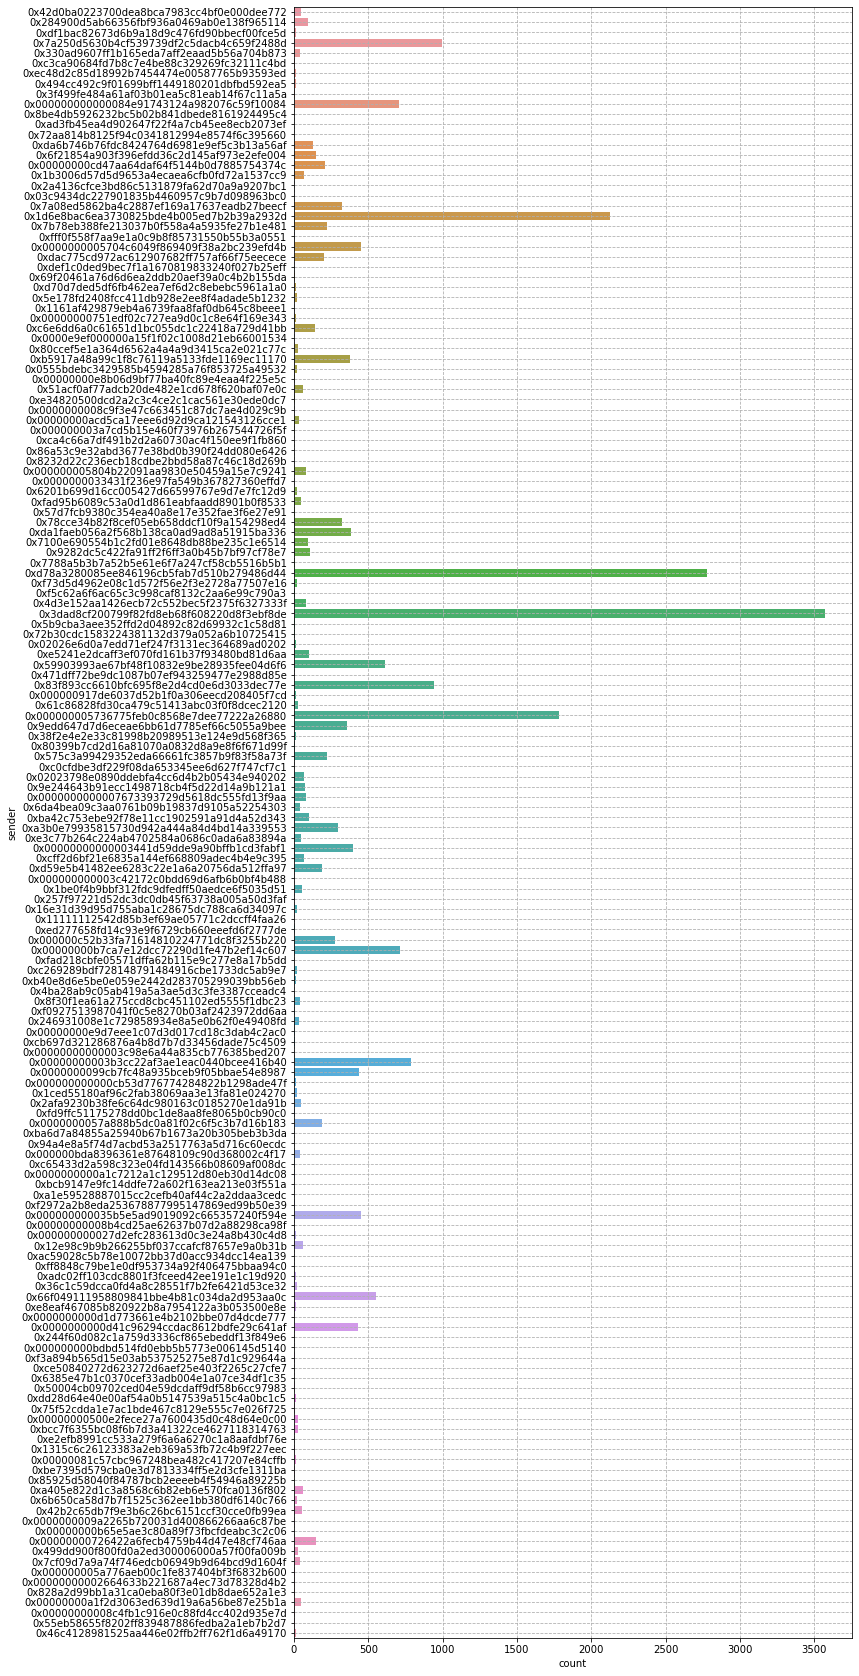

In [34]:
fig = plt.figure(figsize=(10, 30))
sns.countplot(y='sender', data=mevs_df)
plt.grid(True, linestyle='--')
plt.show()